In [1]:
import numpy as np
import matplotlib.pyplot as plt

### discrete fourier transform

In [2]:
def dft_k(x, k):
    t = np.linspace(0, 1, len(x), endpoint=False)
    e = np.exp(-1j * 2 * np.pi * k * t)
    return (x @ e) * np.sqrt(1/len(x))

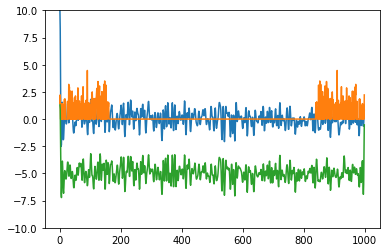

In [3]:
x = sum(np.cos(np.linspace(0, x_, num=1000)) for x_ in np.random.rand(100)*1000)/10
f = np.array([dft_k(x,k) for k in range(1000)])
f = np.where(abs(f)>1, f, 0j)
y = np.array([dft_k(f,-k) for k in range(1000)])
plt.plot(x)
plt.plot(abs(f))
plt.plot(np.real(y)-5)
plt.ylim((-10,10))
plt.show()

### discrete cosine transform type 4

In [4]:
def dct_iv_k(x, k):
    n = np.linspace(0,len(x),len(x),endpoint=False)
    c = np.cos((np.pi/len(x))*(n+0.5)*(k+0.5))
    return (x @ c) * np.sqrt(2/len(x))

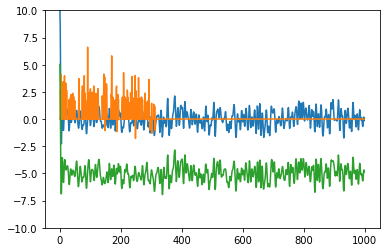

In [5]:
x = sum(np.cos(np.linspace(0, x_, num=1000)) for x_ in np.random.rand(100)*1000)/10
#x = np.cos(np.linspace(0, 100, num=1000))
f = np.array([dct_iv_k(x,k) for k in range(1000)])
f = np.where(abs(f)>1, f, 0)
y = np.array([dct_iv_k(f,k) for k in range(1000)])
plt.plot(x)
plt.plot(f)
plt.plot(y-5)
plt.ylim((-10,10))
plt.show()

### modified discrete cosine transform

In [6]:
def dct_iv_k_2(x, k):
    n = np.linspace(0,len(x),len(x),endpoint=False)
    c = np.cos((np.pi/len(x))*(n+0.5)*(k+0.5))
    return (x @ c) * np.sqrt(1/len(x))

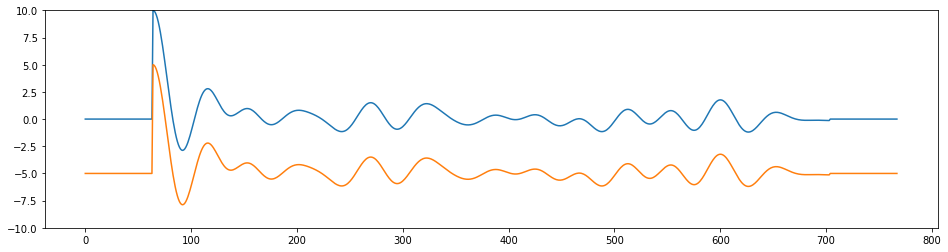

In [7]:
N = 64
M = 10
#x = np.linspace(0, 20*np.pi, num=M*N)
#x = np.cos(x) * ((x+1)/(20*np.pi)) * 2
x = sum(np.cos(np.linspace(0, x_/10, num=M*N)) for x_ in np.random.rand(100)*1000) / 10
x = np.concatenate([np.zeros((N,)), x, np.zeros((N,))])
f = np.array([[dct_iv_k_2(
                np.concatenate([
                    -np.flip(x[o+N:o+N*3//2],0) - x[o+N*3//2:o+N*2],
                    x[o:o+N//2] - np.flip(x[o+N//2:o+N],0),
                ]),k)
                for k in range(N)] for o in range(0,(M+1)*N,N)])
#f = np.where(abs(f)>0.125, f, 0)
y = np.zeros_like(x)
for i in range(len(f)):
    o = i*N
    y_ = np.array([dct_iv_k_2(f[i],k) for k in range(N*2)])
    y[o:o+N//2] += -np.flip(y_[N:N*3//2],0)
    y[o+N//2:o+N] += -np.flip(y_[N//2:N],0)
    y[o+N:o+N*3//2] += y_[N*3//2:N*2]
    y[o+N*3//2:o+N*2] += -y_[0:N//2]
plt.figure(figsize=(16,4))
plt.plot(x)
plt.plot(y-5)
plt.ylim((-10,10))
plt.show()

### a discrete cosine transform neural layer

In [8]:
import tensorflow as tf
import keras
import keras.backend as K

Using TensorFlow backend.


In [9]:
X = X_input = keras.layers.Input((None, 1))
X = keras.layers.Permute((2,1))(X)
X = keras.layers.Lambda(lambda x: tf.spectral.dct(x, norm='ortho'))(X)
X = keras.layers.Permute((2,1))(X)
M_dct = keras.Model(X_input, X)
M_dct.compile('adam', 'mse')
M_dct.summary()

X = X_input = keras.layers.Input((None, 1))
X = keras.layers.Permute((2,1))(X)
X = keras.layers.Lambda(lambda x: tf.spectral.idct(x, norm='ortho'))(X)
X = keras.layers.Permute((2,1))(X)
M_idct = keras.Model(X_input, X)
M_idct.compile('adam', 'mse')
M_idct.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, 1)           0         
_________________________________________________________________
permute_1 (Permute)          (None, 1, None)           0         
_________________________________________________________________
lambda_1 (Lambda)            (None, None, None)        0         
_________________________________________________________________
permute_2 (Permute)          (None, None, None)        0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, 1)           0         
_________________________________________________________________
permute_3 (Permu

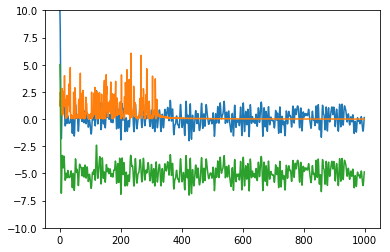

In [10]:
x = sum(np.cos(np.linspace(0, x_, num=1000)) for x_ in np.random.rand(100)*1000)/10
x = x[np.newaxis,:,np.newaxis]
f = M_dct.predict(x)
#f = np.where(abs(f)>1, f, 0)
y = M_idct.predict(f)
plt.plot(x[0,:,0])
plt.plot(abs(f[0,:,0]))
plt.plot(y[0,:,0]-5)
plt.ylim((-10,10))
plt.show()